In [7]:
! python -V

Python 3.12.4


In [8]:
import math
import time
import random
import numpy as np
import json
from concurrent.futures import ProcessPoolExecutor
import multiprocessing as mp
from bessel_zeros import get_bessel_zeros
from scipy.special import jv, jvp, gamma, loggamma
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import matplotlib.patches as patches
font = font_manager.FontProperties(style='normal', size=20)
import matplotlib.ticker as ticker
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')

from bessel_zeros import get_bessel_zeros
from CDFs3_working import build_cdfs as build_cdfs
import seaborn as sns

In [9]:
# open a json file to save path lengths
d = 15
with open(f"path_length_{d}.json", 'r') as json_file:
        # Use json.load() to convert the file content into a Python dictionary
        length_dict = json.load(json_file)

In [10]:
avg_length = np.array([[s, np.mean(length)] for s, length in length_dict.items()])
avg_length = avg_length.astype(float)
np.round(avg_length,3,out=None)

array([[5.0000e-03, 2.0000e+00],
       [1.0000e-02, 2.0000e+00],
       [1.5000e-02, 2.0000e+00],
       [2.0000e-02, 2.0000e+00],
       [2.5000e-02, 2.0010e+00],
       [3.0000e-02, 2.0070e+00],
       [3.5000e-02, 2.0300e+00],
       [4.0000e-02, 2.0820e+00],
       [4.5000e-02, 2.1750e+00],
       [5.0000e-02, 2.3200e+00],
       [5.5000e-02, 2.5280e+00],
       [6.0000e-02, 2.8170e+00],
       [6.5000e-02, 3.2040e+00],
       [7.0000e-02, 3.7410e+00],
       [7.5000e-02, 4.4040e+00],
       [8.0000e-02, 5.2830e+00],
       [8.5000e-02, 6.4390e+00],
       [9.0000e-02, 7.7700e+00],
       [9.5000e-02, 9.3940e+00],
       [1.0000e-01, 1.1156e+01],
       [1.0500e-01, 1.3140e+01],
       [1.1000e-01, 1.5160e+01],
       [1.1500e-01, 1.7437e+01],
       [1.2000e-01, 1.9511e+01],
       [1.2500e-01, 2.1707e+01],
       [1.3000e-01, 2.3837e+01],
       [1.3500e-01, 2.6091e+01],
       [1.4000e-01, 2.8173e+01],
       [1.4500e-01, 3.0200e+01],
       [1.5000e-01, 3.2245e+01],
       [1.

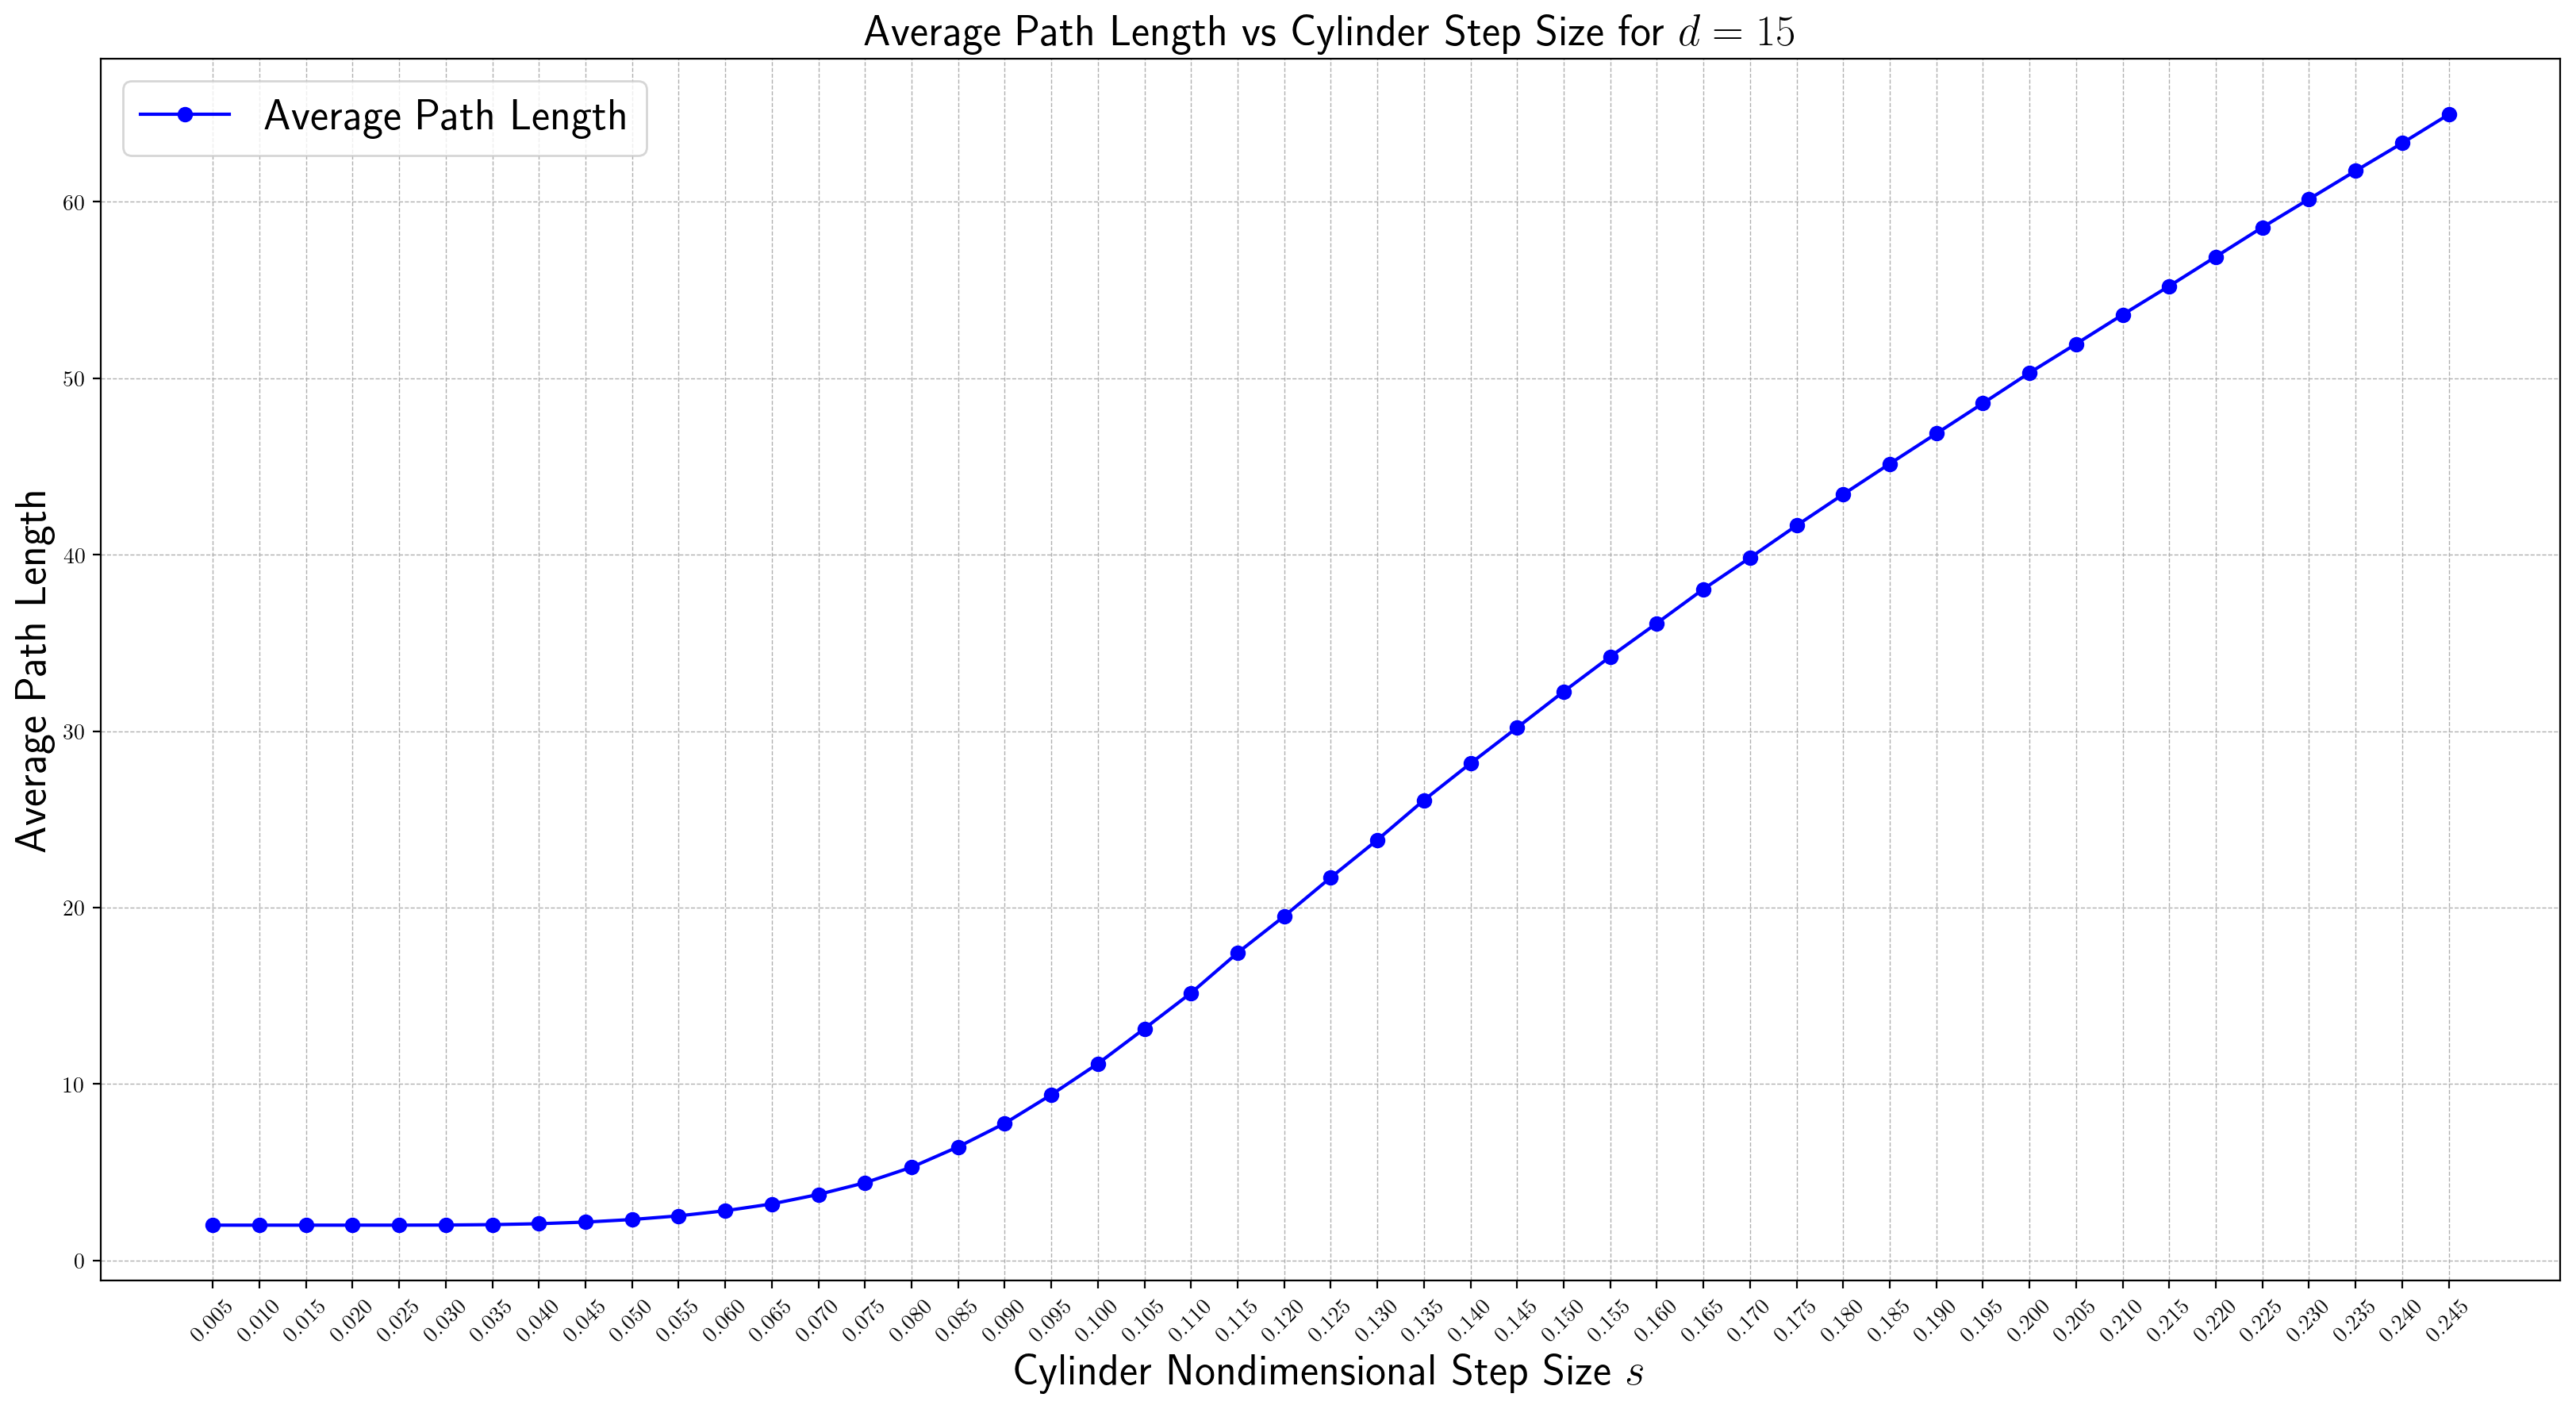

In [17]:
# ── PLOTTING ────────────────────────────────────────────────────────────────
f , ax = plt.subplots(figsize=(20, 10),dpi=200)
ax.plot(avg_length[:,0], avg_length[:,1], marker='o', linestyle='-', color='blue', label='Average Path Length')
plt.xlabel('Cylinder Nondimensional Step Size $s$', fontproperties=font)
plt.ylabel('Average Path Length', fontproperties=font)
plt.title(f'Average Path Length vs Cylinder Step Size for $d={d}$', fontproperties=font)
ax.set_xticks(avg_length[:,0])
plt.xticks(rotation=45);
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(prop=font)
plt.show()
f.savefig(f'avg_path_length_{d}.pdf',format="pdf",dpi=600)

In [12]:
#finding the slopes
(avg_length[1:,1] - avg_length[:-1,1]) / (avg_length[1:,0] - avg_length[:-1,0])

array([0.00000e+00, 0.00000e+00, 0.00000e+00, 1.72000e-01, 1.32800e+00,
       4.54400e+00, 1.03600e+01, 1.85760e+01, 2.91040e+01, 4.15640e+01,
       5.76760e+01, 7.74480e+01, 1.07376e+02, 1.32748e+02, 1.75676e+02,
       2.31252e+02, 2.66148e+02, 3.24768e+02, 3.52376e+02, 3.96968e+02,
       4.03864e+02, 4.55532e+02, 4.14624e+02, 4.39332e+02, 4.25976e+02,
       4.50732e+02, 4.16464e+02, 4.05320e+02, 4.08988e+02, 3.95492e+02,
       3.79196e+02, 3.86460e+02, 3.55640e+02, 3.65104e+02, 3.53408e+02,
       3.46976e+02, 3.42100e+02, 3.43232e+02, 3.45512e+02, 3.27304e+02,
       3.32044e+02, 3.23960e+02, 3.32844e+02, 3.32876e+02, 3.19700e+02,
       3.20092e+02, 3.14448e+02, 3.25260e+02])